# <center>     Multiple Linear Regression Model     <center>

# Multiple linear regression model by using fuel consumption data

### Data Features

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUELTYPE** e.g. z
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## 1. Importing all the required liberaries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error as mse

## 2. Loading dataset

In [2]:
fuel_data = pd.read_csv("C:\\Users\\HP\\Documents\\Machine learning\\Dataset\\FuelConsumptionCo2.csv")
print(fuel_data.shape)
fuel_data.head()

(1067, 13)


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
fuel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 87.6+ KB


In [4]:
fuel_data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
# Selecting feature variable(X) and target variable(y)
cf = fuel_data[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
cf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


<function matplotlib.pyplot.show(close=None, block=None)>

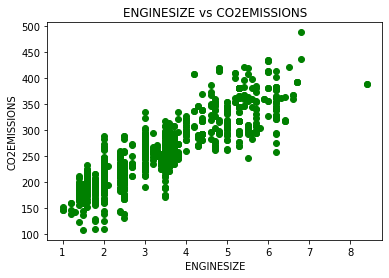

In [6]:
# Let's plot Emission values with respect to Engine size:
plt.scatter(cf.ENGINESIZE, cf.CO2EMISSIONS, color = "green")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.title("ENGINESIZE vs CO2EMISSIONS")
plt.show

## 3.Spliting the dataset

In [7]:
# Selceting x-features and y-targets
X = cf[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]]
y = cf["CO2EMISSIONS"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print("size of the trainset :", (x_train.shape), (y_train.shape))
print("size of the testset :", (x_test.shape), (y_test.shape))

size of the trainset : (853, 3) (853,)
size of the testset : (214, 3) (214,)


## 4. Now making model

In [8]:
lr = LinearRegression()
model = lr.fit(x_train, y_train)
train_pred = model.predict(x_train)
print ('Coefficients: ', lr.coef_)


Coefficients:  [11.98993058  7.54469599  8.98695981]


In [9]:
test_pred = model.predict(x_test)
print("R squared :", model.score(x_test, y_test))
print("mse : ", mse(y_test, test_pred))

R squared : 0.8604199405627129
mse :  589.2351940837905


In [14]:
# model testing 
pred = model.predict([[2.0, 4, 8.5]])
pred

array([199.60001342])

# Lets add some more features in our sets

In [15]:
new_X = cf[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY"]]
y = cf["CO2EMISSIONS"]

In [36]:
train_x, test_x, train_y, test_y = train_test_split(new_X, y, test_size = 0.2, random_state = 0)

In [41]:
up_model = lr.fit(train_x, train_y)
ypred = up_model.predict(test_x)
print ('Coefficients: ', lr.coef_)
print("R squared (accuracy):", model.score(test_x, test_y))
print("mse : ", mse(test_y, ypred))

Coefficients:  [11.99897826  7.61636533  4.7423976   4.29566523]
R squared (accuracy): 0.8599443136450631
mse :  591.2430462101092


# Main Output

In [39]:
result = up_model.predict([[2.0, 4, 9.9, 6.7]])
result

array([199.12481909])